In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

## Question 1:

In [2]:
# Importing the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
y_test.shape

(10000,)

In [3]:
# Reshaping the data into 784 feautes for 1 image
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)
Y_train = y_train.reshape(60000,1)
Y_test = y_test.reshape(10000,1)

In [41]:
clf_SGD = SGDClassifier()

clf_SGD.fit(X_train, Y_train)
Y_pred = clf_SGD.predict(X_test)

C:\Users\vip\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\vip\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
clf_SGD.score(X_test, Y_test)

0.8591

In [43]:
# Identifying indexes of misclassified images

i = 0
misclassifiedIndexes_SGD = []
for label, predict in zip(Y_test, Y_pred):
    if label != predict: 
        misclassifiedIndexes_SGD.append(i)
    i +=1

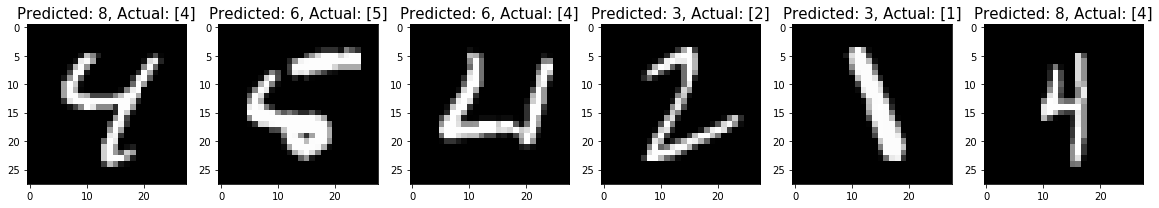

In [44]:
# Plotting first 6 misclassified indixes
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes_SGD[0:6]):
    plt.subplot(1, 6, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(Y_pred[badIndex], Y_test[badIndex]), fontsize = 15)

#### As we can see some of the above images are poorly written and visually confusing. This is how they are different from properly classified images.

In [45]:
# Defining grid for hyperparameter search
grid = {
    'alpha': [1e-4, 1e-3, 1e-2,], # learning rate
    'penalty': ['l1', 'l2']
}

In [47]:
# Hyperparameter Search
clf_SGD_HS = RandomizedSearchCV(clf_SGD, grid, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
best_model_SGD = clf_SGD_HS.fit(X_train, Y_train)

C:\Users\vip\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\vip\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\vip\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#printing best parameters. (l1 regularization worked better in this case)
clf_SGD_HS.best_params_

{'penalty': 'l1', 'alpha': 0.0001}

In [50]:
clf_SGD_HS.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
# Training with best parameters found above
clf1_Improved = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

clf1_Improved.fit(X_train, Y_train)
clf1_Improved_pred = clf1_Improved.predict(X_test)
clf1_Improved.score(X_test, Y_test)

C:\Users\vip\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\vip\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9024

#### As we can see results significantly improved after Hyperparameter search

#### Part b: Please note that solver='saga' uses both kind of regularization l1 and l2 but this took very long on computer so I used solver='lbfgs' instead. Problem here is 'lbfgs' doesn't use l1 regularization so I couldn't use it for my hyperparameter search.

In [52]:
# Repeating the same steps now with logistic regression

clf_LR = LogisticRegression(solver='lbfgs')

clf_LR.fit(X_train, Y_train)
Y2_pred = clf_LR.predict(X_test)

C:\Users\vip\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vip\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vip\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vip\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vip\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

In [53]:
clf_LR.score(X_test, Y_test)

0.9179

In [54]:
# Identifying indexes of misclassified images
i = 0
misclassifiedIndexes_LR = []
for label, predict in zip(Y_test, Y2_pred):
    if label != predict: 
        misclassifiedIndexes_LR.append(i)
    i +=1

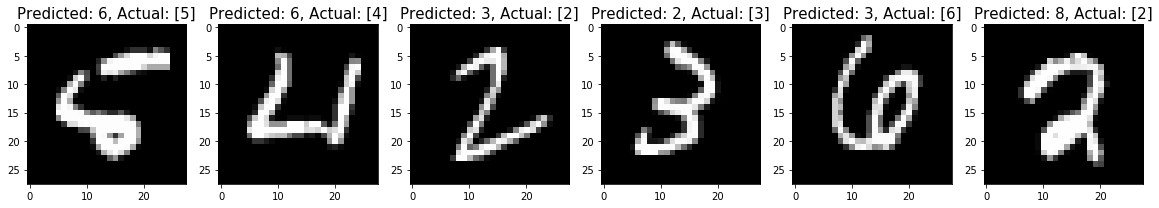

In [55]:
# Plotting first 6 misclassified indixes
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes_LR[0:6]):
    plt.subplot(1, 6, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(Y2_pred[badIndex], Y_test[badIndex]), fontsize = 15)

#### Similar to previous case, some of the above images are poorly written and visually confusing. This is how they are different from properly classified images.

In [56]:
## As explained above, couldn't use Hyperparameter search in this case 
grid_LR = {
    'penalty': ['l1', 'l2']
}

In [57]:
'''
clf_LR_HS = RandomizedSearchCV(clf_LR, grid_LR, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
clf_LR_HS.fit(X_train, Y_train)
'''

'\nclf_LR_HS = RandomizedSearchCV(clf_LR, grid_LR, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)\nclf_LR_HS.fit(X_train, Y_train)\n'

#### Logistic regression performed better than SGD even without using best parameters (as I couln't do hyperparameter search)

### D) If we were to use random guessing, we will have a probablity of 0.1 but now we are able to accurately determine the number in image with an accuracy of 0.91. Hence, out method is atleast 9 times more accurate.

## Question 2:

In [58]:
## Code from the lecture

L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)

In [59]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2]))
# build final data set
Data=[states,energies]

In [60]:
# define number of samples
n_samples=500
# define train and test data sets
X_train=Data[0][:n_samples]
Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
X_test=Data[0][n_samples:3*n_samples//2]
Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

In [61]:
leastsq = LinearRegression()
MSE = []

In [62]:
# define number of samples
n_samples_arr = np.arange(100,5100,250)
for n_samples in n_samples_arr:
    X_train=Data[0][:n_samples]
    Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
    X_test=Data[0][n_samples:3*n_samples//2]
    Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

    ### ordinary least squares
    leastsq.fit(X_train, Y_train) # fit model 
    MLz  = leastsq.predict(X_test)
    mse = np.mean(np.sum((MLz - Y_test)**2))
    MSE.append(mse)

Text(0, 0.5, 'Mean Squ. Error')

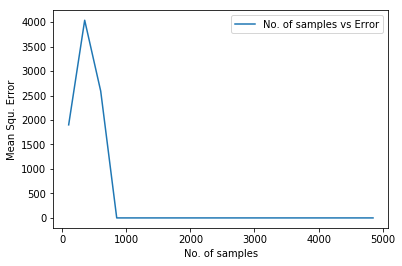

In [63]:
plt.plot(n_samples_arr, MSE, label='No. of samples vs Error')
plt.legend()
plt.xlabel('No. of samples')
plt.ylabel('Mean Squ. Error')

#### Not much change after 1000 samples